###### Contributors A.Radhakrishnan, Natalie O'Leary. 

Acknowledgment: 

Adcroft, Alistair; Blanton, Chris; McHugh, Colleen; Nikonov, Serguei; Radhakrishnan, Aparna; Zadeh, Niki T.; Anderson, Whit; Bushuk, Mitchell; Dufour, Carolina O; Dunne, John P.; Griffies, Stephen M.; Hallberg, Robert; Harrison, Matthew; Held, Isaac M; Jansen, Malte F; John, Jasmin G; Krasting, John P.; Langenhorst, Amy; Legg, Sony; Liang, Zhi; Reichl, Brandon G; Rosati, Anthony; Samuels, Bonita L.; Shao, Andrew; Stouffer, Ronald; Winton, Michael; Wittenberg, Andrew T.; Xiang, Baoqiang; Zhang, Rong (2018). NOAA-GFDL GFDL-CM4 model output prepared for CMIP6 OMIP. Version YYYYMMDD[1].Earth System Grid Federation. https://doi.org/10.22033/ESGF/CMIP6.1403

Pangeo https://pangeo.io/

Cookbooks 

https://mom6-analysiscookbook.readthedocs.io/en/latest/01a_setting_up_dask_jobqueue.html

https://github.com/aradhakrishnanGFDL/enes2020

Thanks to GFDL scientists and modeling systems division, particularly V.Balaji, Serguei Nikonov, Hans Vahlenkamp, Kristopher Rand. Thanks to AWS and ASDI collaborators. 

In [ ]:
from dask.distributed import Client
import dask.array as da
#Please substitute the actual cluster address below.
cluster = "XXXXX" 

# Connect Dask to the cluster
client = Client(cluster)

In [4]:
import s3fs 
import xarray as xr
%matplotlib inline
#DONT PUT THE CREDENTIALS IN THE GITHUB FILE
# please note key and secret is needed to run this script. Contact GFDL.
fs_s3 = s3fs.S3FileSystem(anon=True) 
dataset = []
s3path = 's3://esgf-world/CMIP6/OMIP/NOAA-GFDL/GFDL-CM4/omip1/r1i1p1f1/Omon/thetao/gr/v20180701/thetao_Omon_GFDL-CM4_omip1_r1i1p1f1_gr_170801-172712.nc'
remote_file_obj = fs_s3.open(s3path, mode='rb')
dataset.append(remote_file_obj)
index1 = 170801
index2 = 172712
while index1 <= 198801:
    index1 += 2000
    if index1 > 198801:
        break
    index2 += 2000
    s3path = 's3://esgf-world/CMIP6/OMIP/NOAA-GFDL/GFDL-CM4/omip1/r1i1p1f1/Omon/thetao/gr/v20180701/thetao_Omon_GFDL-CM4_omip1_r1i1p1f1_gr_' + str(index1) + '-' + str(index2) + '.nc'
    remote_file = fs_s3.open(s3path, mode='rb')
    dataset.append(remote_file)
ds = xr.open_mfdataset(dataset, chunks={'time': 1}, combine='by_coords')

In [5]:
ds.thetao

,Array,Chunk
Bytes,32.66 GB,9.07 MB
Shape,"(3600, 35, 180, 360)","(1, 35, 180, 360)"
Count,7215 Tasks,3600 Chunks
Type,float32,numpy.ndarray


In [5]:
client

Client Scheduler: tcp://a37956a2e5dbd46c9a4e12cc09f7b6fb-221729152.us-west-2.elb.amazonaws.com:8786 Dashboard: http://a37956a2e5dbd46c9a4e12cc09f7b6fb-221729152.us-west-2.elb.amazonaws.com:8787/status,Cluster Workers: 4 Cores: 12 Memory: 41.40 GB


In [9]:
temp_mean = ds['thetao'].mean(dim=['time'])


CPU times: user 1.79 s, sys: 64.1 ms, total: 1.86 s
Wall time: 5min 8s


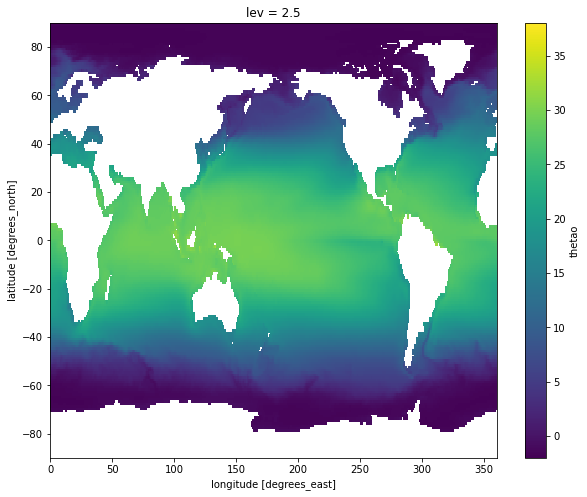

In [10]:
%time temp_mean.sel(lev=2.5).plot(figsize=[10, 8], vmin=-2, vmax=38, cmap='viridis')

In [6]:
thetao = ds['thetao'].loc["1708-01-16"]
thetao

<xarray.DataArray 'thetao' (time: 1, lev: 35, lat: 180, lon: 360)>
dask.array<getitem, shape=(1, 35, 180, 360), dtype=float32, chunksize=(1, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lev      (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * time     (time) object 1708-01-16 12:00:00
Attributes:
    long_name:      Sea Water Potential Temperature
    units:          degC
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello volume: volcello
    standard_name:  sea_water_potential_temperature
    interp_method:  conserve_order1
    original_name:  thetao
    comment:        Model data on the 1x1 grid includes values in all cells f...

CPU times: user 76.6 ms, sys: 0 ns, total: 76.6 ms
Wall time: 601 ms


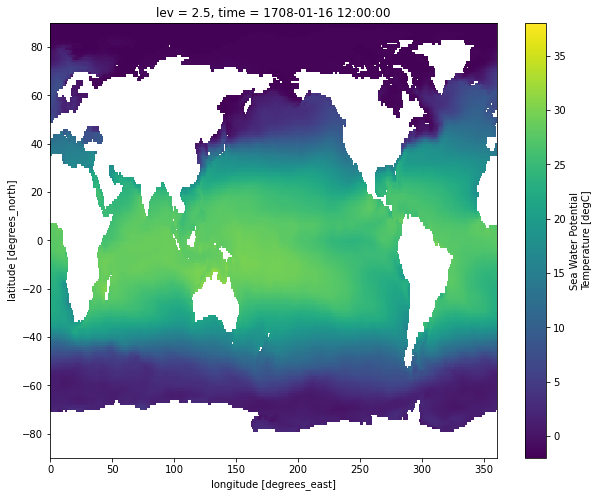

In [7]:
%time thetao.sel(lev=2.5).plot(figsize=[10, 8], vmin=-2, vmax=38, cmap='viridis')

In [2]:
import blosc
print(blosc.__version__)

1.9.1


In [11]:
client.close()